# Predicting Vehicle MSRP using Multiple Regression Analysis
#### By: Connor Schultz and Aiden Bull

### 1. Introduction

Intro goes here.



### 2. Data
Data section goes here.


### 3. Analysis Methods
Methods intro goes here.

#### 3.1. Data Preprocessing
Data Preproc goes here.

In [117]:
#Import required python3 packages
import os
import numpy as np
import pandas as pd
import nbinteract as nbi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [118]:
#Read data in from processed .csv file
#Fully Encoded data: processed using data_cleaner_fe.py
cwd = os.getcwd()
data_fe = pd.read_csv(cwd+"/car_data/fe_cars.csv")
data_fe = data_fe.drop(columns = ['Unnamed: 0'])
#Semi-Encoded data: processed using data_cleaner_se.py
data_se = pd.read_csv(cwd+"/car_data/se_cars.csv")
data_se = data_se.drop(columns = ['Unnamed: 0'])

data = [data_fe, data_se]
data = [scale(x) for x in data]

print("Fully Encoded Dataframe Dimensions: %s" % str(data_fe.shape))
print("Semi-Encoded Dataframe Dimensions: %s" % str(data_se.shape))

Fully Encoded Dataframe Dimensions: (15808, 938)
Semi-Encoded Dataframe Dimensions: (12873, 64)


In [119]:
#Prepare data for regression analysis
Y_fe, Y_se = data_fe['MSRP'], data_se['MSRP']

X_fe, X_se = data_fe.drop(columns = ['MSRP']), data_se.drop(columns = ['MSRP'])

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, Y_fe, test_size = 0.25)
X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_se, Y_se, test_size = 0.25)

X_train, X_test = [X_train_fe, X_train_se], [X_test_fe, X_test_se]
y_train, y_test = [y_train_fe, y_train_se], [y_test_fe, y_test_se]

#### 3.2. Least Squares Linear Regression
Linear regression goes here.

In [120]:
#Model Fitting
lin = [LinearRegression().fit(X_train[0], y_train[0]), LinearRegression().fit(X_train[1], y_train[1])]
#Prediction
pred_lin = [lin[0].predict(X_test[0]), lin[1].predict(X_test[1])] 
#Metrics
mae_lin = [mean_absolute_error(y_test[0], pred_lin[0]), mean_absolute_error(y_test[1], pred_lin[1])]
rmse_lin = [np.sqrt(mean_squared_error(y_test[0], pred_lin[0])), np.sqrt(mean_squared_error(y_test[1], pred_lin[1]))]
r2_lin = [r2_score(y_test[0], pred_lin[0]), r2_score(y_test[1], pred_lin[1])]

#### 3.3. Ridge Regression
Ridge regression goes here.

In [121]:
#Model Fitting
ridge = [Ridge(alpha = 0.01).fit(X_train[0], y_train[0]), Ridge(alpha = 0.01).fit(X_train[1], y_train[1])]
#Prediction
pred_ridge = [ridge[0].predict(X_test[0]), ridge[1].predict(X_test[1])] 
#Metrics
mae_ridge = [mean_absolute_error(y_test[0], pred_ridge[0]), mean_absolute_error(y_test[1], pred_ridge[1])]
rmse_ridge = [np.sqrt(mean_squared_error(y_test[0], pred_ridge[0])), np.sqrt(mean_squared_error(y_test[1], pred_ridge[1]))]
r2_ridge = [r2_score(y_test[0], pred_ridge[0]), r2_score(y_test[1], pred_ridge[1])]

#### 3.4. Lasso Regression
lasso regression goes here.

In [122]:
#Model Fitting
lasso = [Lasso(alpha=0.01).fit(X_train[0], y_train[0]), Lasso(alpha=0.01).fit(X_train[1], y_train[1])]
#Prediction
pred_lasso = [lasso[0].predict(X_test[0]), lasso[1].predict(X_test[1])] 
#Metrics
mae_lasso = [mean_absolute_error(y_test[0], pred_lasso[0]), mean_absolute_error(y_test[1], pred_lasso[1])]
rmse_lasso = [np.sqrt(mean_squared_error(y_test[0], pred_lasso[0])), np.sqrt(mean_squared_error(y_test[1], pred_lasso[1]))]
r2_lasso = [r2_score(y_test[0], pred_lasso[0]), r2_score(y_test[1], pred_lasso[1])]

/home/connor/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97995624853.46446, tolerance: 334421733.1336486
  positive)
/home/connor/.local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1010614656485.1318, tolerance: 806681656.9773849
  positive)


### 3. Results and Discussion

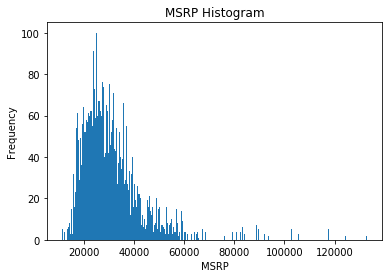

In [86]:
plt.hist(Y_fe,bins = 1000)
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.title('MSRP Histogram');


In [125]:
data = [["Linear Regression", "Fully Encoded", data_fe.shape, mae_lin[0], rmse_lin[0], r2_lin[0]],
        ["Linear Regression", "Semi-Encoded", data_se.shape, mae_lin[1], rmse_lin[1], r2_lin[1]],                                                                                        ["Ridge Regression", "Fully Encoded", data_fe.shape, mae_ridge[0], rmse_ridge[0], r2_ridge[0]],
        ["Ridge Regression", "Semi-Encoded", data_se.shape, mae_ridge[1], rmse_ridge[1], r2_ridge[1]],
        ["Lasso Regression", "Fully Encoded", data_fe.shape, mae_lasso[0], rmse_lasso[0], r2_lasso[0]],
        ["Lasso Regression", "Semi-Encoded", data_se.shape, mae_lasso[1], rmse_lasso[1], r2_lasso[1]]]                                                                                                                                                                               
columns = ["Model", "Dataset", "Dataframe Dimensions", "Mean Absolute Error", "Root Mean Square Error", "R^2 value"]
pd.DataFrame(data, columns=columns)

,Model,Dataset,Dataframe Dimensions,Mean Absolute Error,Root Mean Square Error,R^2 value
0,Linear Regression,Fully Encoded,"(15808, 938)",2624.243007,4307.962287,0.929636
1,Linear Regression,Semi-Encoded,"(12873, 64)",7722.167107,17599.905612,0.686697
2,Ridge Regression,Fully Encoded,"(15808, 938)",2625.367582,4306.379844,0.929688
3,Ridge Regression,Semi-Encoded,"(12873, 64)",7723.261971,17599.240139,0.686720
4,Lasso Regression,Fully Encoded,"(15808, 938)",2624.200920,4306.220490,0.929693
5,Lasso Regression,Semi-Encoded,"(12873, 64)",7740.020767,17605.785086,0.686487


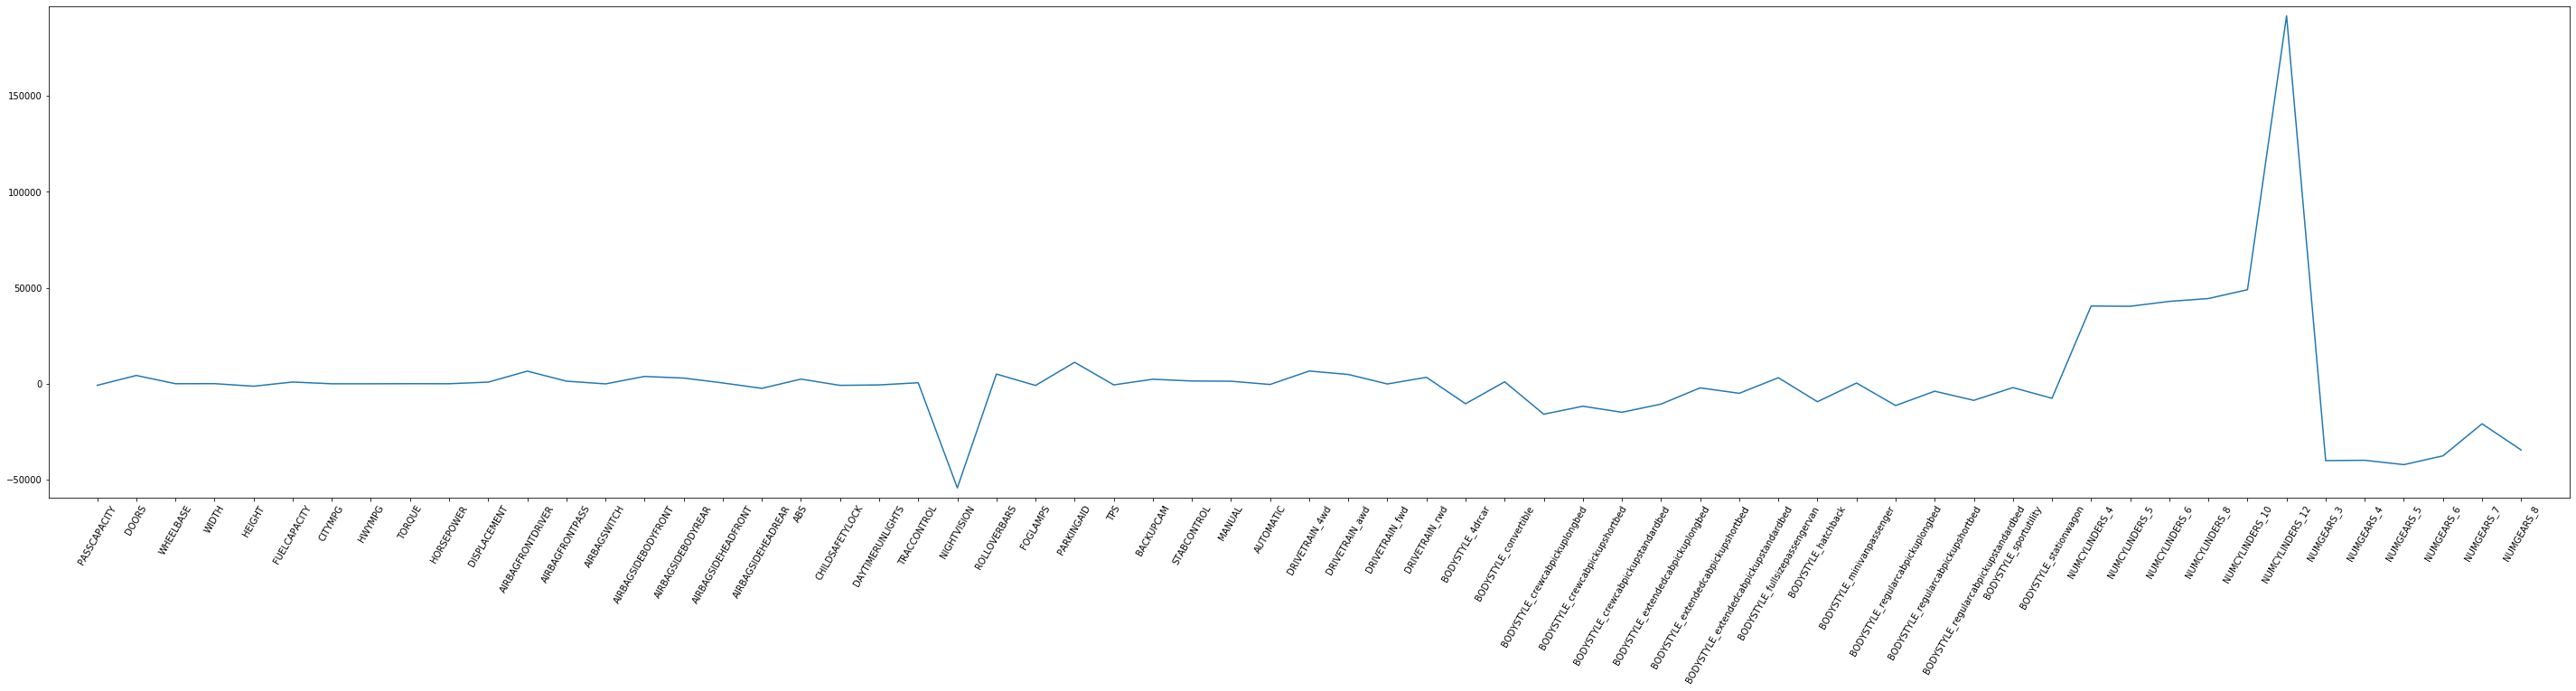

In [124]:
# Plot the coefficients
plt.figure(figsize= (50, 10))
plt.plot(range(len(X_test[1].columns)), lin[1].coef_)
plt.xticks(range(len(X_test[1].columns)), X_test[1].columns.values, rotation=60) 
plt.margins(0.02)
plt.show()


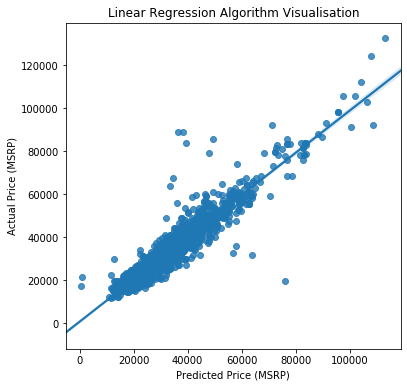

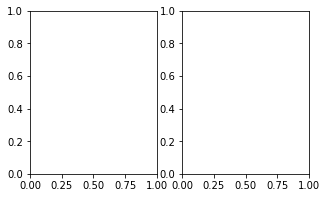

In [91]:
model = lin[0]

plt.figure(figsize= (6, 6))
plt.title('Linear Regression Algorithm Visualisation')
a = sns.regplot(model.predict(X_test[0]), y_test[0])
plt.xlabel("Predicted Price (MSRP)")
plt.ylabel("Actual Price (MSRP)")
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5,3))
